In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas

In [2]:
class ElectionPlotter(object):
    def __init__(self, year=None, election=None):
        self.year = year
        self.election = election
        
    def plot_all(self, **plot_opts):
        plots = [
            {
                "xcolumn": "Support",
                "xlabel": "Support votes",
            },
            {
                "xcolumn": "support_percentage",
                "xlabel": "Support percentage (S / (S + O))",
                "as_percentage": True,
            },
            {
                "xcolumn": "Oppose",
                "xlabel": "Oppose votes",
            },
        ]
        
        tallies = pandas.read_csv("../data/" + self.year + " " + self.election + " election.csv")
        tallies = tallies.assign(support_percentage = lambda x: x.Support / (x.Support + x.Oppose))

        for spec in plots:
            spec.update(plot_opts)
            self.hbar_tallies(tallies, **spec)

    def hbar_tallies(self, tallies, xcolumn=None, xlabel=None, head_size=999, fontsize=16, as_percentage=False, **plot_opts):
        fig = plt.figure(**plot_opts)
        ax = fig.add_subplot(111)

        sorted_tallies = tallies.sort_values(by=xcolumn, ascending=False)
        if as_percentage:
            sorted_tallies[xcolumn] = [p * 100 for p in sorted_tallies[xcolumn]]
        sorted_tallies[xcolumn].head(head_size).plot(kind='barh', ax=ax)

        ax.set_xlabel(xlabel, fontsize=fontsize)
        ax.set_yticklabels(sorted_tallies['Candidate'].head(head_size).values, fontsize=fontsize);
        ax.invert_yaxis()
        if as_percentage:
            ax.set_xlim(0, 100)

        plt.savefig('../graphs/' + self.year + ' ' + self.election
                    + ' ' + xcolumn + '.png', bbox_inches='tight', dpi=300)

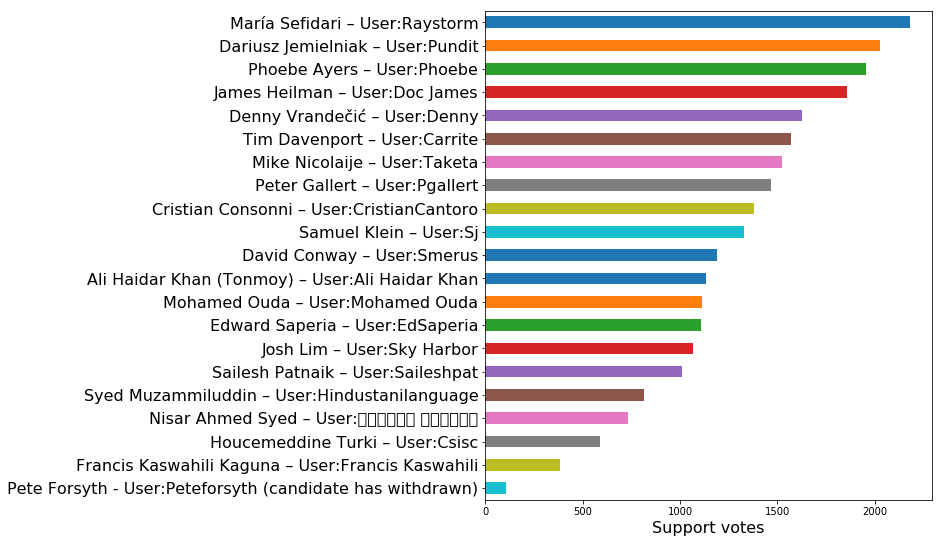

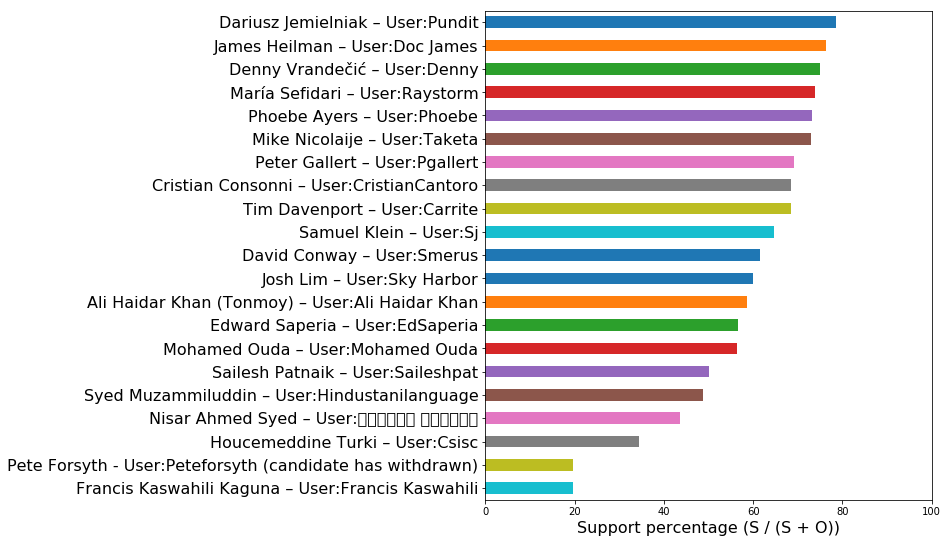

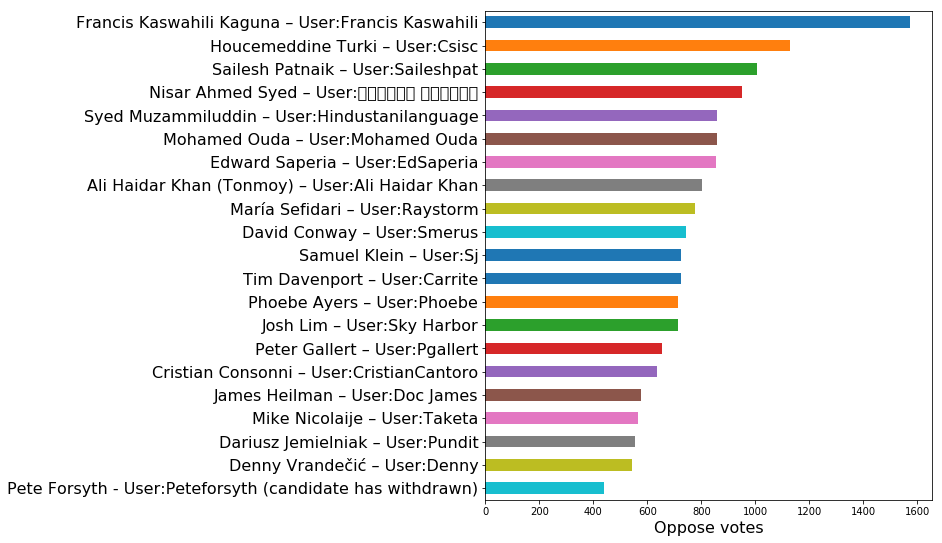

In [3]:
ElectionPlotter(year="2015", election="board").plot_all(figsize=(8, 9))

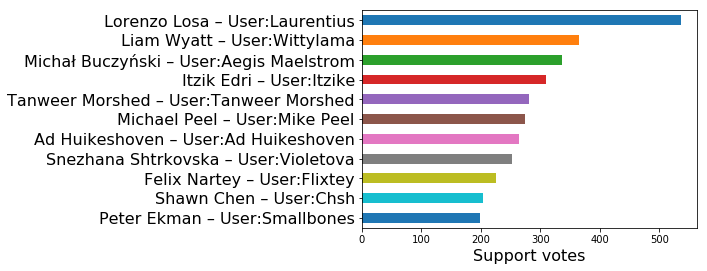

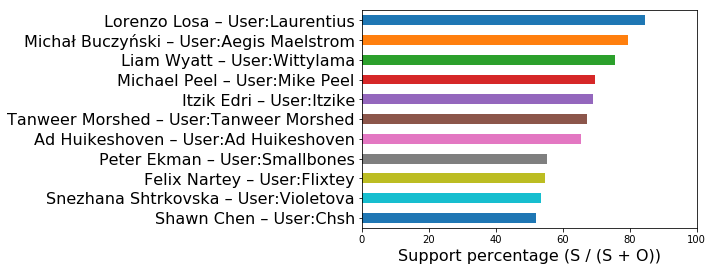

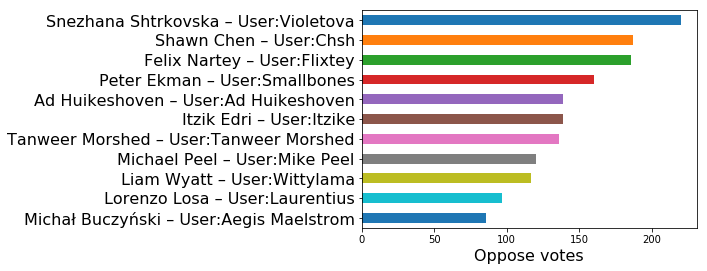

In [4]:
ElectionPlotter(year="2015", election="fdc").plot_all()

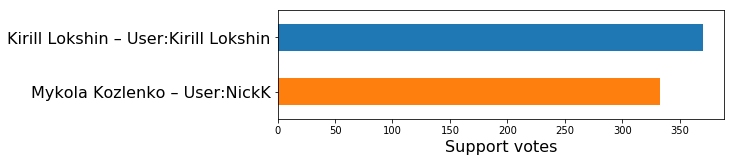

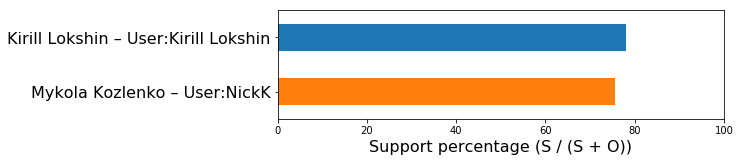

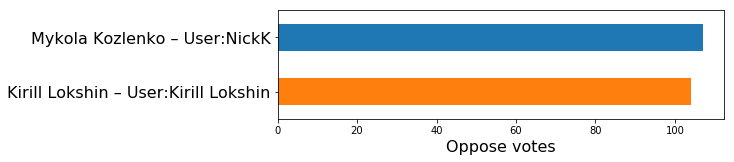

In [5]:
ElectionPlotter(year="2015", election="fdc ombuds").plot_all(figsize=(8, 2))

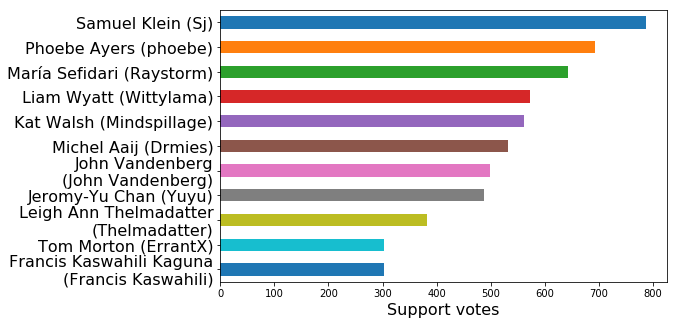

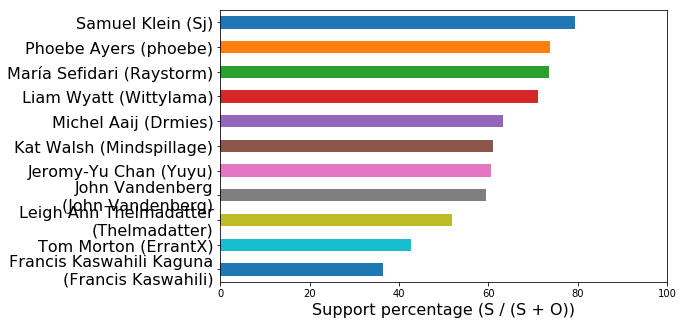

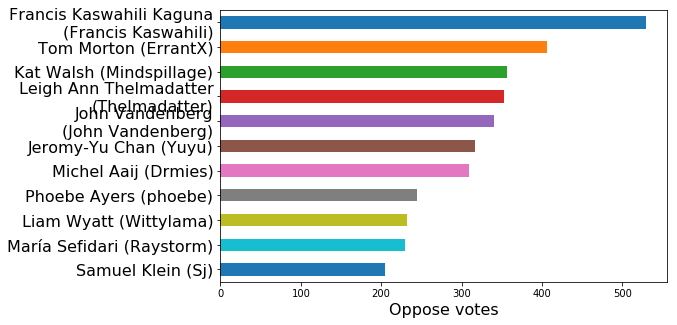

In [6]:
ElectionPlotter(year="2013", election="board").plot_all(figsize=(8, 5))

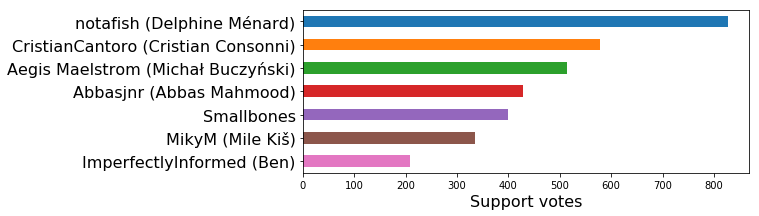

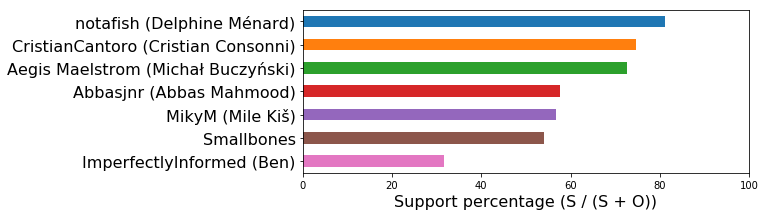

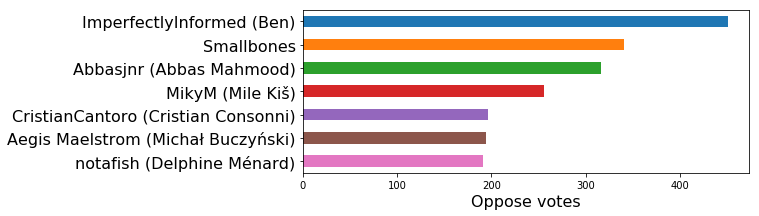

In [7]:
ElectionPlotter(year="2013", election="fdc").plot_all(figsize=(8, 3))

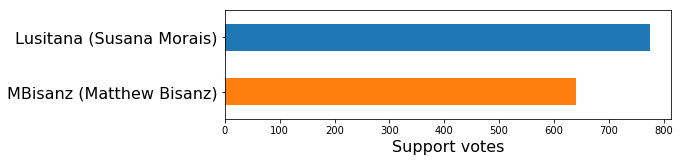

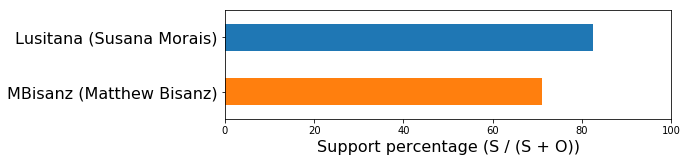

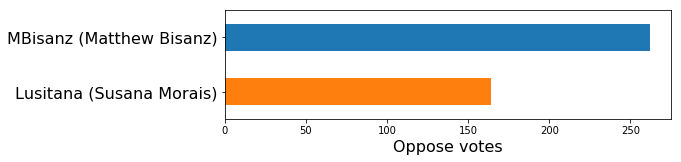

In [8]:
ElectionPlotter(year="2013", election="fdc ombuds").plot_all(figsize=(8, 2))